In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('Titanic-Dataset.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum()

# Age → numeric → fill with median

# Embarked → categorical → fill with mode

# Cabin → too many missing → drop

# Other columns → usually no missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df=df.drop(columns=['Cabin'])

In [9]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [10]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [11]:
# To check most frequent values in Embarked
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [12]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [13]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [14]:
df_1=pd.get_dummies(df,columns=['Sex','Embarked'],drop_first=True,dtype=int)

In [15]:
df_1.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1


In [16]:
df_1=df_1.drop(columns=['PassengerId','Name','Ticket'])

In [17]:
df_1

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,28.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


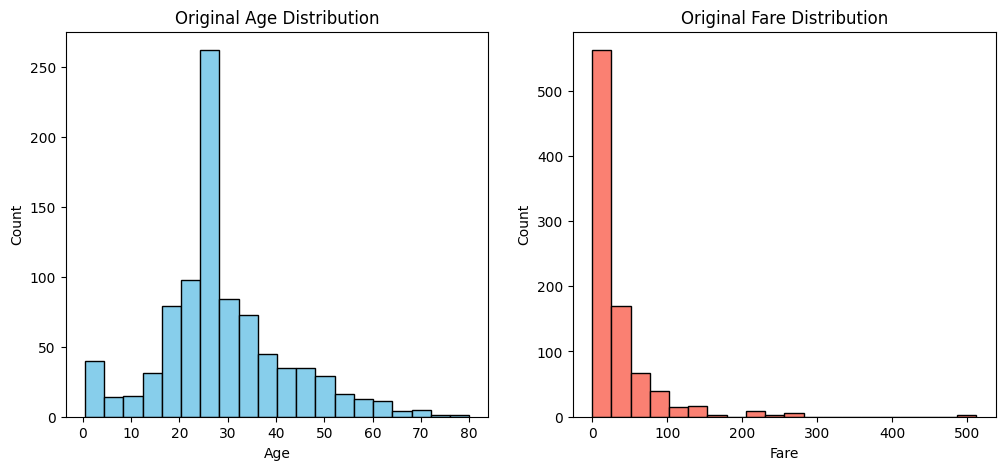

In [18]:


plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(df_1['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Original Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1,2,2)
plt.hist(df_1['Fare'], bins=20, color='salmon', edgecolor='black')
plt.title('Original Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')

plt.show()


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_1[['Age', 'Fare']] = scaler.fit_transform(df_1[['Age', 'Fare']])

# from sklearn.preprocessing import RobustScaler

# scaler = RobustScaler()
# df_1[['Age','Fare']] = scaler.fit_transform(df_1[['Age','Fare']])


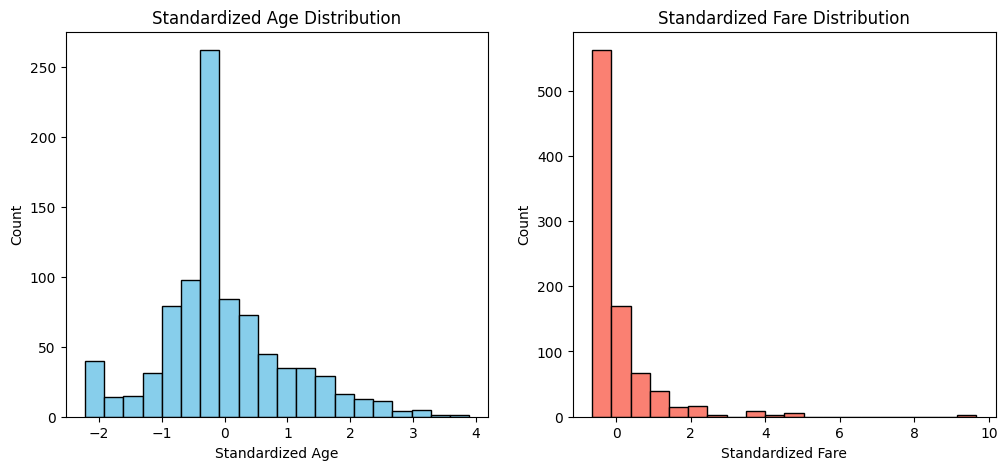

In [20]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(df_1['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Standardized Age Distribution')
plt.xlabel('Standardized Age')
plt.ylabel('Count')

plt.subplot(1,2,2)
plt.hist(df_1['Fare'], bins=20, color='salmon', edgecolor='black')
plt.title('Standardized Fare Distribution')
plt.xlabel('Standardized Fare')
plt.ylabel('Count')

plt.show()

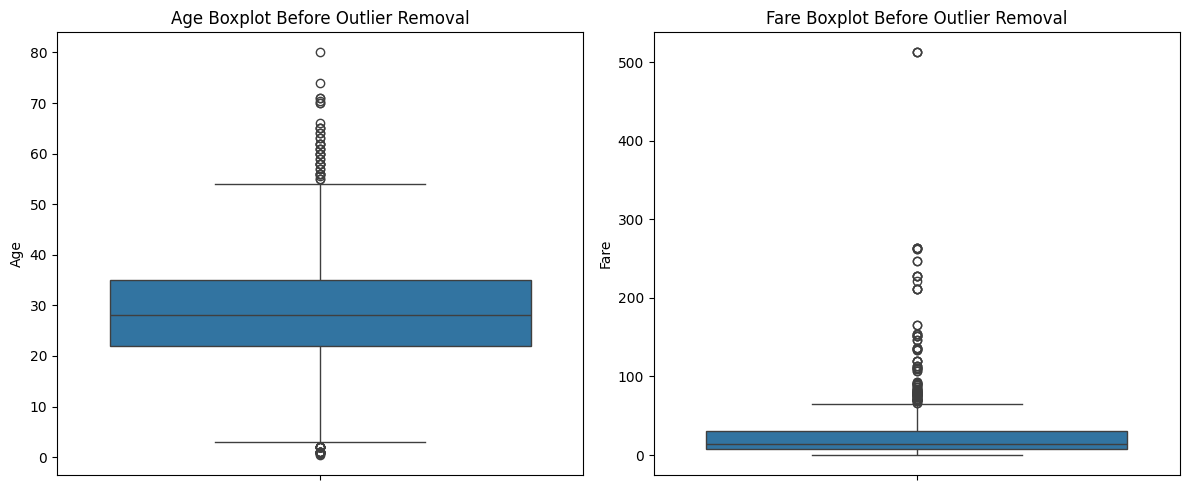

In [21]:
# # Boxplot to visualize Age outliers
# import seaborn as sns
# plt.figure(figsize=(12,5))
# plt.subplot(1,2,1)
# sns.boxplot(df['Age'])
# plt.title('Age Boxplot Before Outlier Removal')
# plt.show()

# # Boxplot to visualize for Fare outliers
# # plt.figure(figsize=(6,4))
# plt.subplot(1,2,2)
# sns.boxplot(df['Fare'])
# plt.title('Fare Boxplot Before Outlier Removal')
# plt.show()
import seaborn as sns
import matplotlib.pyplot as plt

# Create one figure with two subplots side by side
plt.figure(figsize=(12, 5))

# Boxplot for Age
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Age'])
plt.title('Age Boxplot Before Outlier Removal')

# Boxplot for Fare
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Fare'])
plt.title('Fare Boxplot Before Outlier Removal')

# Show both plots together
plt.tight_layout()
plt.show()


In [22]:
# Removing Outliers
Q1 = df_1[['Age','Fare']].quantile(0.25)
Q3 = df_1[['Age','Fare']].quantile(0.75)
IQR = Q3 - Q1

df_1 = df_1[~((df_1[['Age','Fare']] < (Q1 - 1.5 * IQR)) | (df_1[['Age','Fare']] > (Q3 + 1.5 * IQR))).any(axis=1)]

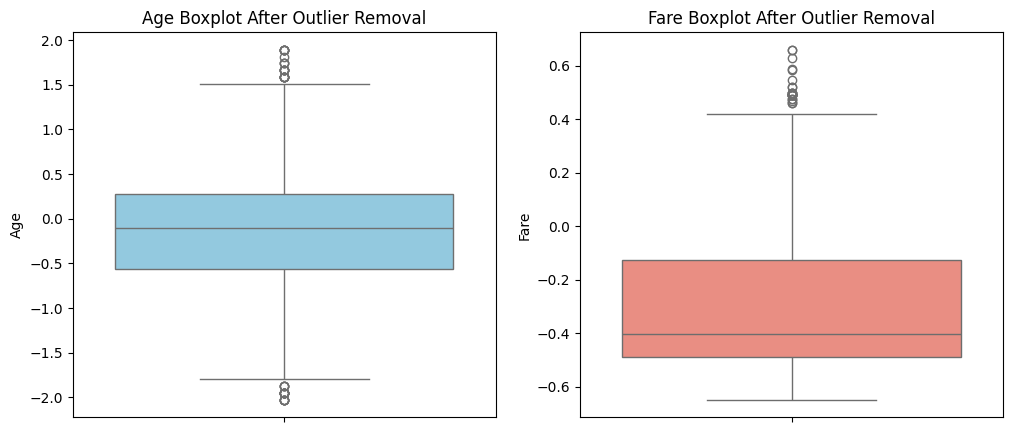

In [23]:
# Visualizing after removing outliers
plt.figure(figsize=(12,5))

# Boxplot for Age
plt.subplot(1,2,1)  # 1 row, 2 columns, first plot
sns.boxplot(df_1['Age'], color='skyblue')
plt.title('Age Boxplot After Outlier Removal')

# Boxplot for Fare
plt.subplot(1,2,2)  # 1 row, 2 columns, second plot
sns.boxplot(df_1['Fare'], color='salmon')
plt.title('Fare Boxplot After Outlier Removal')

plt.show()